In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data preprocessing

In [76]:
input_data1 = pd.read_csv('trippub.csv')
vehicle_data = pd.read_csv('vehpub.csv')


## Finding EV trips

In [90]:
EVs = vehicle_data[vehicle_data.FUELTYPE == 3]
test = input_data1.loc[input_data1['HOUSEID'].isin(EVs.HOUSEID.unique())]

,HOUSEID,PERSONID,TDTRPNUM,STRTTIME,ENDTIME,TRVLCMIN,TRPMILES,TRPTRANS,TRPACCMP,TRPHHACC,...,OBHTNRNT,OBPPOPDN,OBRESDN,DTHTNRNT,DTPPOPDN,DTRESDN,DTEEMPDN,DBHTNRNT,DBPPOPDN,DBRESDN
42,30000041,1,1,800,945,105,68.406,3,0,0,...,40,300,300,60,17000,7000,5000,40,7000,3000
43,30000041,1,2,1800,2000,120,73.720,3,0,0,...,40,7000,3000,40,300,50,25,40,300,300
44,30000041,2,1,700,715,15,0.688,1,0,0,...,40,300,300,40,300,50,25,40,300,300
45,30000041,2,2,800,815,15,0.688,1,0,0,...,40,300,300,40,300,50,25,40,300,300
46,30000041,2,3,900,1100,120,77.937,3,0,0,...,40,300,300,40,7000,7000,5000,50,7000,7000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
923060,40793295,1,2,1248,1300,12,4.855,3,0,0,...,20,750,300,30,750,750,350,30,750,750
923061,40793295,1,3,1440,1522,42,24.100,3,0,0,...,30,750,750,90,300,50,150,80,50,50
923062,40793295,1,4,2023,2054,31,17.966,3,0,0,...,80,50,50,20,1500,750,350,5,3000,1500
923223,40793727,1,1,600,645,45,34.846,4,0,0,...,20,7000,3000,5,1500,1500,750,5,1500,1500


In [110]:
useful_data = test[['HOUSEID','STRTTIME','ENDTIME','TRPMILES','VEHID','TRVLCMIN','VEHTYPE']]

useful = useful_data[useful_data.TRPMILES > 0]
useful = useful[useful.TRPMILES < 150]

# useful = useful[useful.VEHTYPE>=1]
# useful = useful[useful.VEHTYPE<=6]
useful

,HOUSEID,STRTTIME,ENDTIME,TRPMILES,VEHID,TRVLCMIN,VEHTYPE
42,30000041,800,945,68.406,2,105,1
43,30000041,1800,2000,73.720,2,120,1
44,30000041,700,715,0.688,-1,15,-1
45,30000041,800,815,0.688,-1,15,-1
46,30000041,900,1100,77.937,1,120,1
...,...,...,...,...,...,...,...
923060,40793295,1248,1300,4.855,2,12,1
923061,40793295,1440,1522,24.100,2,42,1
923062,40793295,2023,2054,17.966,2,31,1
923223,40793727,600,645,34.846,1,45,3


## Changing the time format

In [111]:
from math import floor
useful_new = useful
eq1 = 'floor(STRTTIME / 100) + (STRTTIME % 100)/60 + 0.1'
eq2 = 'floor(ENDTIME / 100) + (ENDTIME % 100)/60 '
useful_new.loc[:,'STRTTIME'] = useful_new.eval(eq1)
useful_new.loc[:,'ENDTIME'] = useful_new.eval(eq2)
useful_new

,HOUSEID,STRTTIME,ENDTIME,TRPMILES,VEHID,TRVLCMIN,VEHTYPE
42,30000041,8.100000,9.750000,68.406,2,105,1
43,30000041,18.100000,20.000000,73.720,2,120,1
44,30000041,7.100000,7.250000,0.688,-1,15,-1
45,30000041,8.100000,8.250000,0.688,-1,15,-1
46,30000041,9.100000,11.000000,77.937,1,120,1
...,...,...,...,...,...,...,...
923060,40793295,12.900000,13.000000,4.855,2,12,1
923061,40793295,14.766667,15.366667,24.100,2,42,1
923062,40793295,20.483333,20.900000,17.966,2,31,1
923223,40793727,6.100000,6.750000,34.846,1,45,3


# Arrival time PDF

(0.0, 24.0)

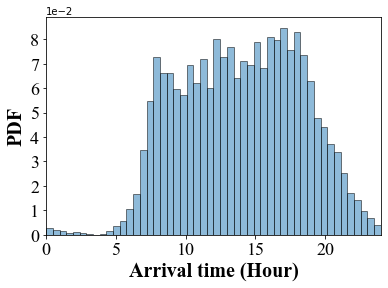

In [112]:
fnt_size=20
fnt_size2=18
csfont = {'fontname':'Times New Roman',
                  'size': fnt_size,
                 'fontweight':'bold'}
csfont2 = {'fontname':'Times New Roman',
                  'size': fnt_size2}
font = {'size': fnt_size}
fig1,ax1 = plt.subplots()
# ax1.hist(data[data.TRPMILES < 200]['TRPMILES'], bins=20, density=True)
ax1.hist(useful_new['ENDTIME'], bins=50, alpha=0.5,edgecolor='black', density=True)
ax1.set_xlabel('Arrival time (Hour)',**csfont)
ax1.set_ylabel('PDF',**csfont)

#ax1.tick_params(axis='both', which='major', labelsize=10) 

#ax1.tick_params(axis='both', which='minor', labelsize=8)
#ax1.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
# ax1.set_title('Distribution of trip distances',**csfont)
#plt.rc('font', **font)
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

plt.xticks(**csfont2)
plt.yticks(**csfont2)
plt.xlim(0,24)
# plt.savefig('PDF_all_data.png',dpi=700, format='png', bbox_inches='tight')

## Fitting GEV distribution

In [113]:
from scipy.stats import genextreme as gev

t = np.linspace(0,24,100)
fit_arrival = gev.fit(useful_new['ENDTIME'])
pdf_arrival = gev.pdf(t, *fit_arrival)

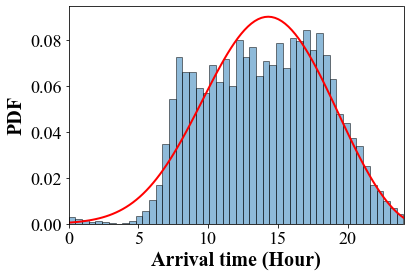

In [114]:
plt.plot(t, pdf_arrival,color='red', linewidth=2)
plt.hist(useful_new['ENDTIME'], bins=50, alpha=0.5,edgecolor='black', density=True);

plt.xlabel('Arrival time (Hour)',**csfont)
plt.ylabel('PDF',**csfont)

plt.xticks(**csfont2)
plt.yticks(**csfont2)
plt.xlim(0,24);

In [115]:
# rv = gev(*fit)
# rv
# r = gev.rvs(*fit, size=1000)


# Departure time PDF

In [116]:
t = np.linspace(0,24,100)
fit_departure = gev.fit(useful_new['STRTTIME'])
pdf_departure = gev.pdf(t, *fit_departure)

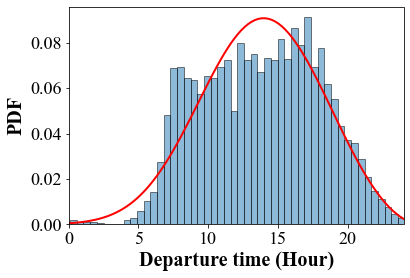

In [117]:
plt.plot(t, pdf_departure,color='red', linewidth=2)
plt.hist(useful_new['STRTTIME'], bins=50, alpha=0.5,edgecolor='black', density=True);

plt.xlabel('Departure time (Hour)',**csfont)
plt.ylabel('PDF',**csfont)

plt.xticks(**csfont2)
plt.yticks(**csfont2)
plt.xlim(0,24);

# Travel distance PDF

In [118]:
from scipy.stats import weibull_min
m = np.linspace(0,150,200)
fit_distance = weibull_min.fit(useful_new['TRPMILES'])
pdf_distance = weibull_min.pdf(m, *fit_distance)

(array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18]),
 <a list of 10 Text major ticklabel objects>)

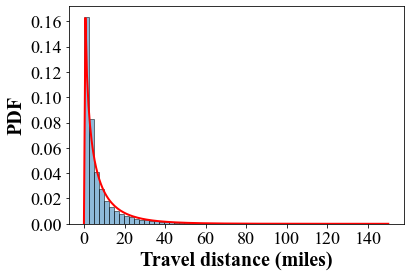

In [119]:
plt.plot(m, pdf_distance,color='red', linewidth=2)
plt.hist(useful_new['TRPMILES'], bins=60, alpha=0.5,edgecolor='black', density=True);

plt.xlabel('Travel distance (miles)',**csfont)
plt.ylabel('PDF',**csfont)

plt.xticks(**csfont2)
plt.yticks(**csfont2)
# plt.xlim(0,150);